In [1]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML

style = "<style>svg{width: 70 !important; height: 70% !important}</style>"
HTML(style)

In [4]:
train_animals = pd.read_csv('dogs_n_cats.csv')

In [5]:
train_animals.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [6]:
train_animals = train_animals.rename(columns={'Длина': 'length',
                                              'Высота' : 'height',
                                              'Шерстист': 'woolly',
                                              'Гавкает' : 'bark',
                                              'Лазает по деревьям' : 'climb',
                                              'Вид' : 'species'})

In [7]:
train_animals.head()

,length,height,woolly,bark,climb,species
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [8]:
X = train_animals.drop(['species'], axis=1)
y = train_animals.species

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [10]:
depth_lvl = range(1, 100)

In [11]:
score_data = pd.DataFrame()

In [12]:
for depth in depth_lvl:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'depth' : [depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    score_data = score_data.append(temp_score_data)

C:\Users\mrbab\AppData\Local\Temp\ipykernel_16548\3982899815.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_16548\3982899815.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_16548\3982899815.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_data)
C:\Users\mrbab\AppData\Local\Temp\ipykernel_16548\3982899815.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_data = score_data.append(temp_score_da

In [13]:
score_data_long = pd.melt(score_data,
                     id_vars='depth',
                     value_vars=['train_score', 'test_score', 'cross_val_score'],
                     var_name='set_type',
                     value_name='score')


In [14]:
score_data.head()

,depth,train_score,test_score,cross_val_score
0,1,1.0,1.0,1.0
0,2,1.0,1.0,1.0
0,3,1.0,1.0,1.0
0,4,1.0,1.0,1.0
0,5,1.0,1.0,1.0


<Axes: xlabel='depth', ylabel='score'>

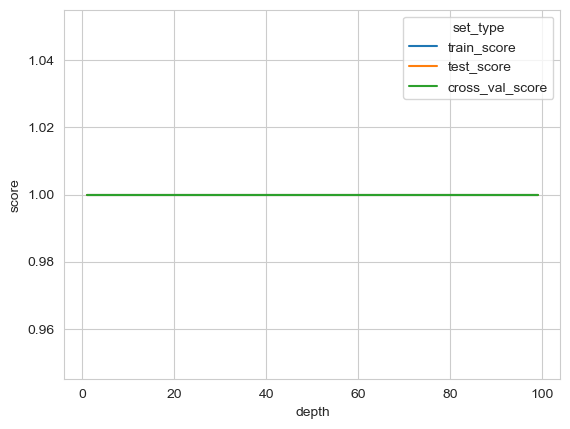

In [15]:
sns.lineplot(x='depth', y='score', hue='set_type',data=score_data_long)

TypeError: BaseDecisionTree.predict() missing 1 required positional argument: 'X'

In [18]:
train_set = pd.read_json('dataset_209691_15.json')

In [19]:
train_set.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,20,24.0,1,1,0
2,18,21.6,1,1,0
3,31,37.2,1,1,0
4,22,26.4,1,1,0


In [20]:
train_set = train_set.rename(columns={'Длина': 'length',
                                       'Высота' : 'height',
                                       'Шерстист': 'woolly',
                                       'Гавкает' : 'bark',
                                       'Лазает по деревьям' : 'climb',
                                       'Вид' : 'species'})

In [ ]:
X_test_f = train_set.drop(['species'], axis=1)

In [21]:
predicted = clf.predict(X_test)

In [38]:
res_data = pd.DataFrame(predicted, columns=['species'])

In [40]:
res_data.groupby('species').agg({'species': 'count'})

,species
species,
котик,167
собачка,163
